In [1]:
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit.circuit.library import CXGate
from noisy_quantum_teleportation_benchmarking.channels import AmplitudeDampingChannel
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit


In [2]:
alice_noise = AmplitudeDampingChannel()
def entangle(qc, q1, q2):
    qc.h(q1)
    qc.cx(q1, q2)


def bell_basis(qc, q1, q2):
    qc.cx(q1, q2)
    qc.h(q1)


In [ ]:
input_reg = QuantumRegister(1, name="input")
alice_reg = QuantumRegister(1, name="alice")
bob_reg = QuantumRegister(1, name="bob")

qc = QuantumCircuit(input_reg, alice_reg, bob_reg)

entangle(qc, alice_reg[0], bob_reg[0])

alice_noise.append_channel_instruction(qc, alice_reg)

bell_basis(qc, input_reg[0], alice_reg[0])

qc.cx(alice_reg[0], bob_reg[0])
qc.cz(input_reg[0], bob_reg[0])

qc.assign_parameters([alice_noise.get_theta(1)], inplace=True)

In [4]:
DensityMatrix.from_label("1").tensor(DensityMatrix.from_label("0")).tensor(DensityMatrix.from_label("0")).tensor(DensityMatrix.from_label("0")).evolve(qc).probabilities_dict([0, 1])

{np.str_('00'): np.float64(9.373498641636607e-34),
 np.str_('01'): np.float64(9.373498641636607e-34),
 np.str_('10'): np.float64(0.49999999999999983),
 np.str_('11'): np.float64(0.49999999999999983)}

In [8]:
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
)
from qiskit.compiler import transpile

input_reg = QuantumRegister(1, name="input")
alice_reg = QuantumRegister(1, name="alice")
bob_reg = QuantumRegister(1, name="bob")
input_meas = ClassicalRegister(1, name="input_meas")
alice_meas = ClassicalRegister(1, name="alice_meas")
bob_meas = ClassicalRegister(1, name="bob_meas")
qc2 = QuantumCircuit(input_reg, alice_reg, bob_reg, input_meas, alice_meas, bob_meas)
entangle(qc2, alice_reg[0], bob_reg[0])
bell_basis(qc2, input_reg[0], alice_reg[0])
qc2.cx(alice_reg[0], bob_reg[0])
qc2.cz(input_reg[0], bob_reg[0])
qc2.measure(input_reg[0], input_meas)
qc2.measure(alice_reg[0], alice_meas)

service = QiskitRuntimeService()
backend = service.backend('ibm_sherbrooke')

transpiled = transpile(
            qc2,
            backend,
            optimization_level=3,
        )

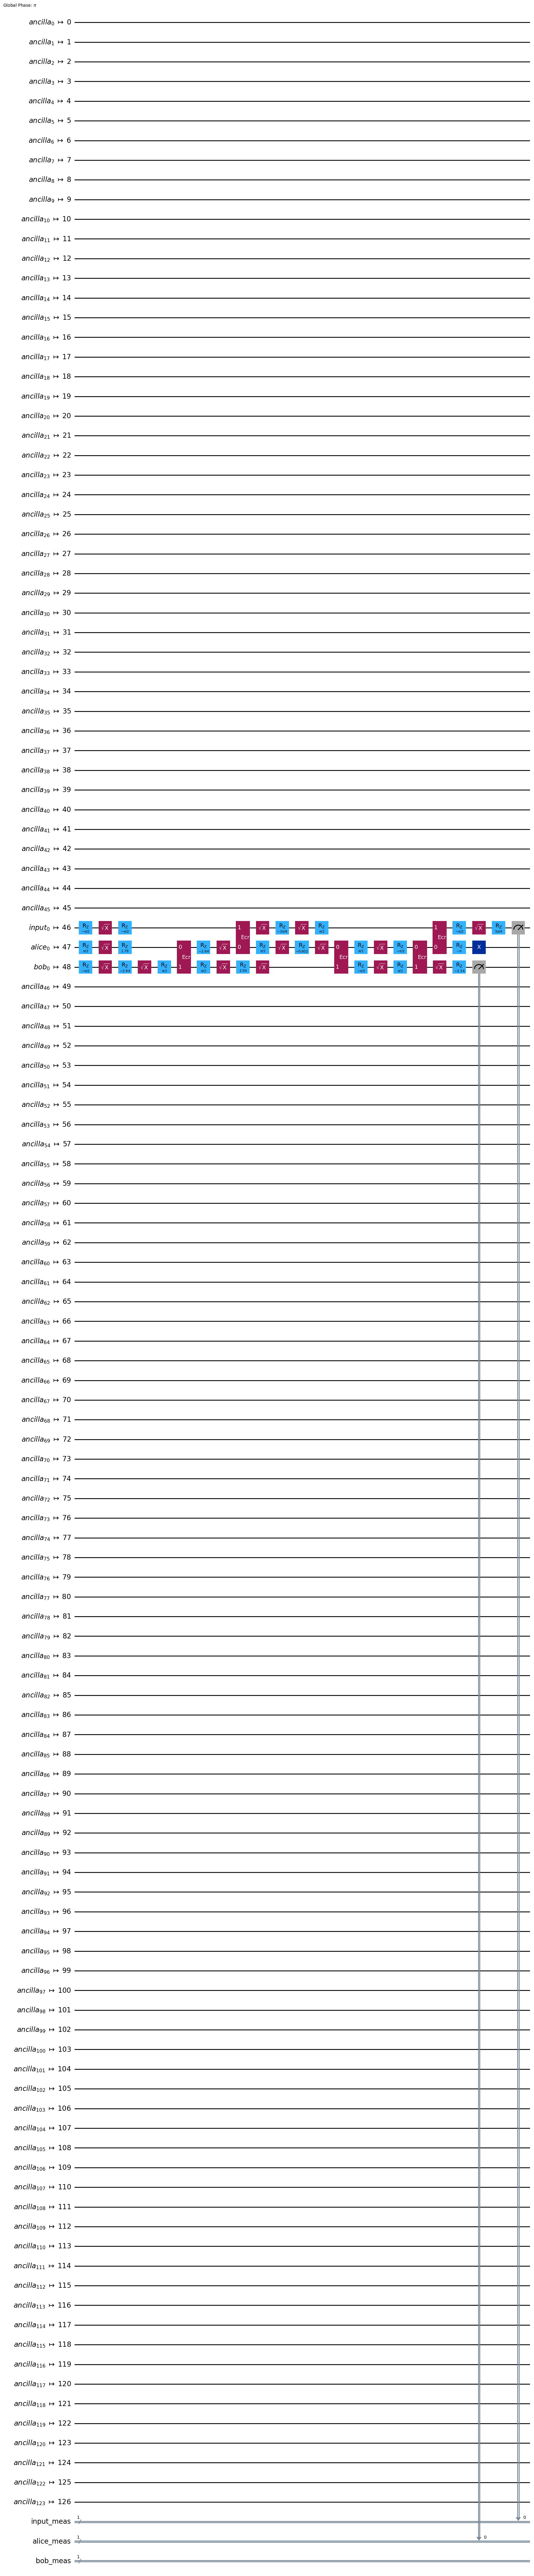

In [10]:
transpiled.draw('mpl')